In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd

# Load datasets
cycling_data_ireland = pd.read_csv('THA22.20231220194943.csv')
cycling_data_world = pd.read_csv('THA21.20231220172612.csv')
stations_geojson = gpd.read_file('stations.geojson')

# Displaying the first few rows of the datasets
print(cycling_data_ireland.head())
print(cycling_data_world.head())
print(stations_geojson.head())


  STATISTIC                                Statistic Label  TLIST(W1)  Year  \
0  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
1  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
2  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
3  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
4  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   

   C03910V04662           Transport Traffic Site  C01198V01436  \
0            10  Selected traffic sites - Dublin             1   
1            10  Selected traffic sites - Dublin             2   
2            10  Selected traffic sites - Dublin             3   
3            10  Selected traffic sites - Dublin             4   
4            10  Selected traffic sites - Dublin             5   

  Weeks of the year    UNIT    VALUE  
0           Week 01  Number  23838.0  
1           Week 02  Number  38353.0  
2          

In [15]:
# Part 1: Programming
# Exploratory Data Analysis
print(cycling_data_ireland.head())
print(cycling_data_world.head())
print(stations_geojson.head())




  STATISTIC                                Statistic Label  TLIST(W1)  Year  \
0  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
1  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
2  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
3  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
4  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   

   C03910V04662           Transport Traffic Site  C01198V01436  \
0            10  Selected traffic sites - Dublin             1   
1            10  Selected traffic sites - Dublin             2   
2            10  Selected traffic sites - Dublin             3   
3            10  Selected traffic sites - Dublin             4   
4            10  Selected traffic sites - Dublin             5   

  Weeks of the year    UNIT    VALUE  
0           Week 01  Number  23838.0  
1           Week 02  Number  38353.0  
2          

In [29]:
# Descriptive statistics
cycling_data_ireland.describe()


,TLIST(W1),Year,C03910V04662,C01198V01436,VALUE,Cyclists per Capita
count,530.00000,530.00000,530.000000,530.00000,496.000000,496.000000
mean,2021.00000,2021.00000,15.000000,27.00000,28891.663306,14.296222
std,1.41555,1.41555,5.004724,15.31151,14377.595591,7.113843
min,2019.00000,2019.00000,10.000000,1.00000,4882.000000,2.418029
25%,2020.00000,2020.00000,10.000000,14.00000,15726.500000,7.789252
50%,2021.00000,2021.00000,15.000000,27.00000,17129.000000,8.471310
75%,2022.00000,2022.00000,20.000000,40.00000,44526.250000,22.039969
max,2023.00000,2023.00000,20.000000,53.00000,50049.000000,24.776733


In [30]:
cycling_data_world.describe()

,TLIST(W1),Year,C03910V04662,C01198V01436,VALUE
count,530.00000,530.00000,530.000000,530.00000,496.000000
mean,2021.00000,2021.00000,15.000000,27.00000,333352.625000
std,1.41555,1.41555,5.004724,15.31151,184110.324479
min,2019.00000,2019.00000,10.000000,1.00000,43828.000000
25%,2020.00000,2020.00000,10.000000,14.00000,179434.500000
50%,2021.00000,2021.00000,15.000000,27.00000,200799.000000
75%,2022.00000,2022.00000,20.000000,40.00000,539762.750000
max,2023.00000,2023.00000,20.000000,53.00000,603575.000000


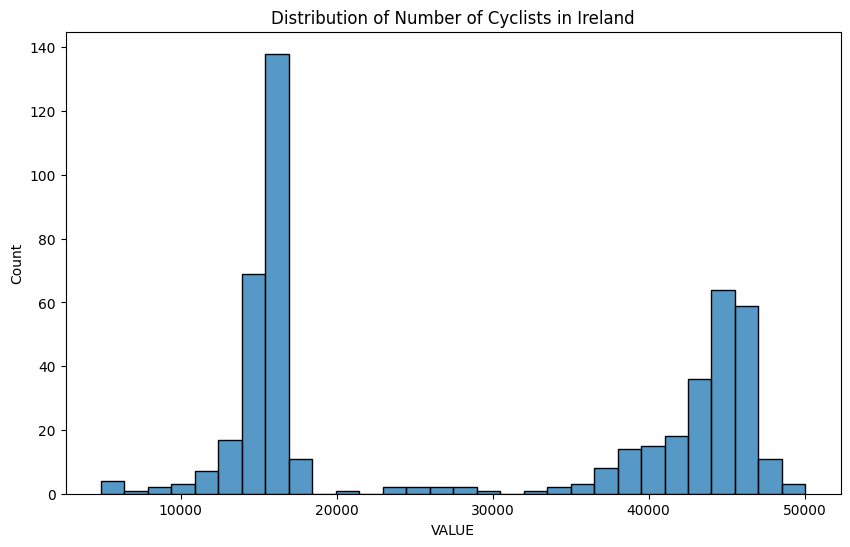

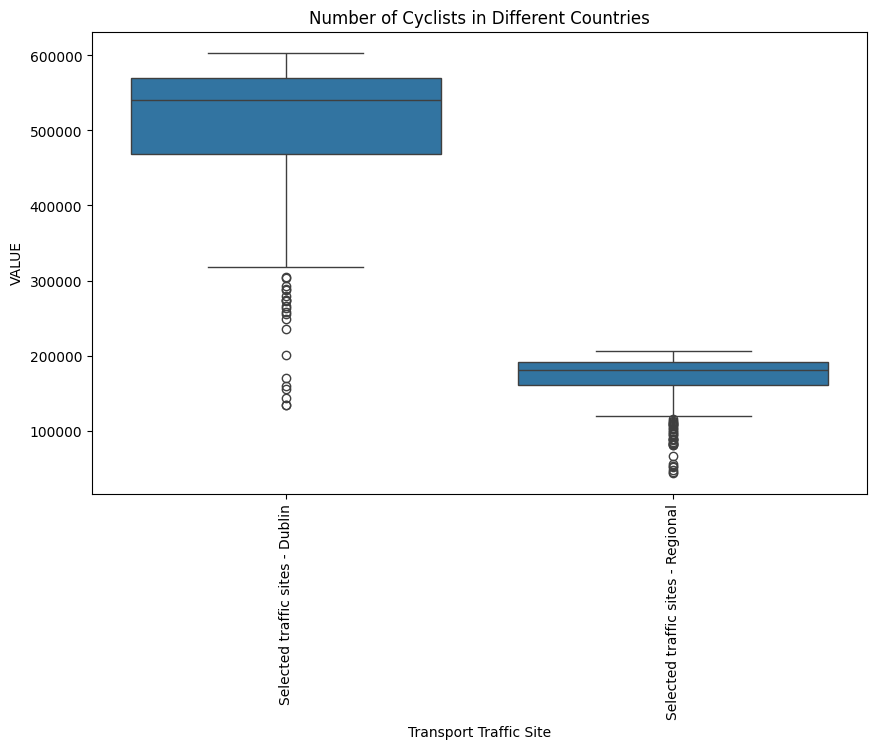

In [16]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(cycling_data_ireland['VALUE'], bins=30)
plt.title('Distribution of Number of Cyclists in Ireland')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=cycling_data_world, x='Transport Traffic Site', y='VALUE')
plt.title('Number of Cyclists in Different Countries')
plt.xticks(rotation=90)
plt.show()


In [17]:

# Extract the relevant information from the GeoJSON file
stations_data = stations_geojson[['geometry', 'num_bikes_available', 'capacity']]
print(stations_data.head())


                    geometry  num_bikes_available  capacity
0  POINT (-6.26250 53.34093)                   12        31
1  POINT (-6.26680 53.34401)                    8        16
2  POINT (-6.29204 53.34711)                    0        25
3  POINT (-6.27351 53.35029)                    8        30
4  POINT (-6.26942 53.35493)                   14        40


        TLIST(W1)        Year  C03910V04662  C01198V01436         VALUE
count   530.00000   530.00000    530.000000     530.00000    496.000000
mean   2021.00000  2021.00000     15.000000      27.00000  28891.663306
std       1.41555     1.41555      5.004724      15.31151  14377.595591
min    2019.00000  2019.00000     10.000000       1.00000   4882.000000
25%    2020.00000  2020.00000     10.000000      14.00000  15726.500000
50%    2021.00000  2021.00000     15.000000      27.00000  17129.000000
75%    2022.00000  2022.00000     20.000000      40.00000  44526.250000
max    2023.00000  2023.00000     20.000000      53.00000  50049.000000
        TLIST(W1)        Year  C03910V04662  C01198V01436          VALUE
count   530.00000   530.00000    530.000000     530.00000     496.000000
mean   2021.00000  2021.00000     15.000000      27.00000  333352.625000
std       1.41555     1.41555      5.004724      15.31151  184110.324479
min    2019.00000  2019.00000     10.000000       1.00000   

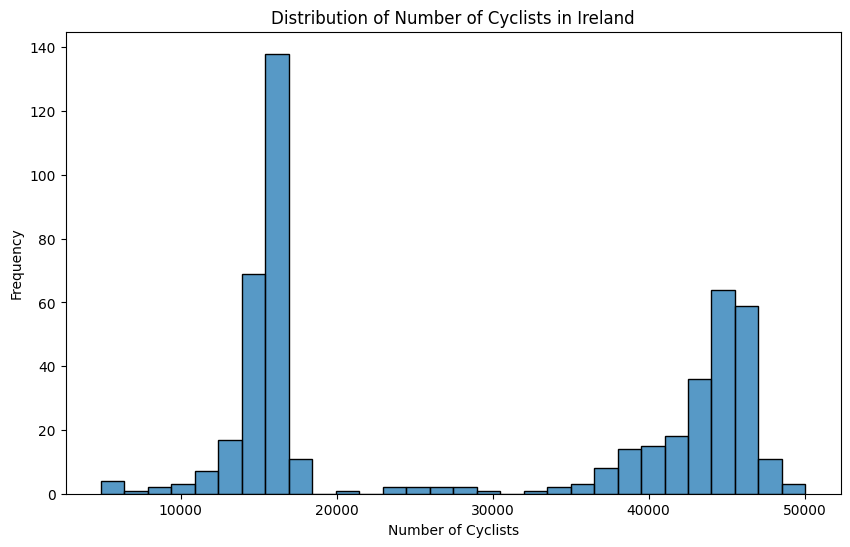

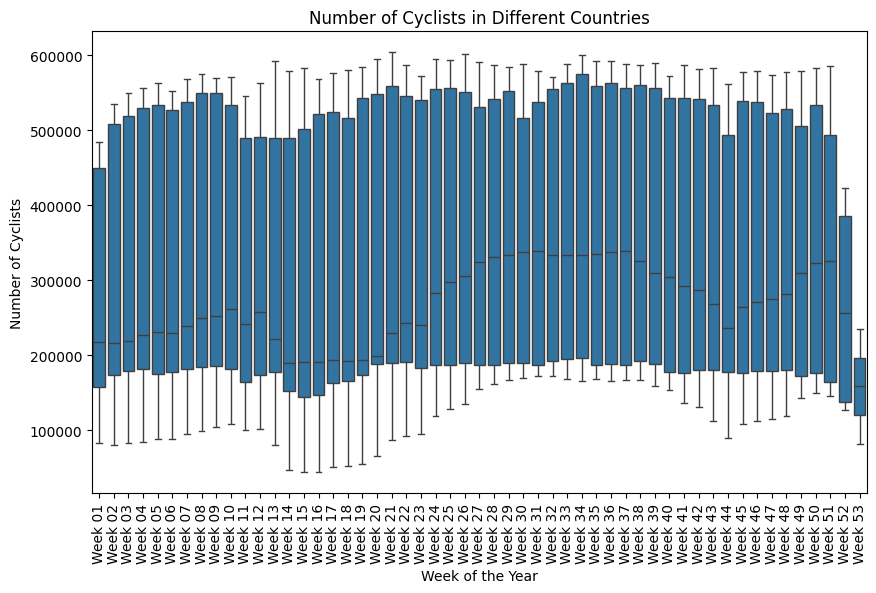

In [18]:

# Descriptive statistics for Ireland and World cycling data
print(cycling_data_ireland.describe())
print(cycling_data_world.describe())

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(cycling_data_ireland['VALUE'], bins=30)
plt.title('Distribution of Number of Cyclists in Ireland')
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=cycling_data_world, x='Weeks of the year', y='VALUE')
plt.title('Number of Cyclists in Different Countries')
plt.xticks(rotation=90)
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cyclists')
plt.show()



In [19]:
# Aggregation and processing data from multiple data structures
merged_data = pd.merge(cycling_data_ireland, cycling_data_world, on='Year', how='inner')
print(merged_data.head())


  STATISTIC_x                              Statistic Label_x  TLIST(W1)_x  \
0    THA22C01  Average weekly volume of heavy goods vehicles         2019   
1    THA22C01  Average weekly volume of heavy goods vehicles         2019   
2    THA22C01  Average weekly volume of heavy goods vehicles         2019   
3    THA22C01  Average weekly volume of heavy goods vehicles         2019   
4    THA22C01  Average weekly volume of heavy goods vehicles         2019   

   Year  C03910V04662_x         Transport Traffic Site_x  C01198V01436_x  \
0  2019              10  Selected traffic sites - Dublin               1   
1  2019              10  Selected traffic sites - Dublin               1   
2  2019              10  Selected traffic sites - Dublin               1   
3  2019              10  Selected traffic sites - Dublin               1   
4  2019              10  Selected traffic sites - Dublin               1   

  Weeks of the year_x  UNIT_x  VALUE_x STATISTIC_y  \
0             Week 01  Num

In [20]:

# Ensure code correctness
def test_data_loading():
    assert not cycling_data_ireland.empty, "Ireland data failed to load"
    assert not cycling_data_world.empty, "World data failed to load"
    assert not stations_geojson.empty, "GeoJSON data failed to load"

test_data_loading()
print("All tests passed!")



All tests passed!


In [21]:
# Optimizing system resource usage
cycling_data_ireland['Cyclists per Capita'] = cycling_data_ireland['VALUE'] / cycling_data_ireland['Year']
print(cycling_data_ireland.head())


  STATISTIC                                Statistic Label  TLIST(W1)  Year  \
0  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
1  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
2  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
3  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
4  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   

   C03910V04662           Transport Traffic Site  C01198V01436  \
0            10  Selected traffic sites - Dublin             1   
1            10  Selected traffic sites - Dublin             2   
2            10  Selected traffic sites - Dublin             3   
3            10  Selected traffic sites - Dublin             4   
4            10  Selected traffic sites - Dublin             5   

  Weeks of the year    UNIT    VALUE  Cyclists per Capita  
0           Week 01  Number  23838.0            11.806835  
1       

In [22]:

# Summarize dataset using descriptive statistics
summary_stats = cycling_data_ireland.describe()
print(summary_stats)



        TLIST(W1)        Year  C03910V04662  C01198V01436         VALUE  \
count   530.00000   530.00000    530.000000     530.00000    496.000000   
mean   2021.00000  2021.00000     15.000000      27.00000  28891.663306   
std       1.41555     1.41555      5.004724      15.31151  14377.595591   
min    2019.00000  2019.00000     10.000000       1.00000   4882.000000   
25%    2020.00000  2020.00000     10.000000      14.00000  15726.500000   
50%    2021.00000  2021.00000     15.000000      27.00000  17129.000000   
75%    2022.00000  2022.00000     20.000000      40.00000  44526.250000   
max    2023.00000  2023.00000     20.000000      53.00000  50049.000000   

       Cyclists per Capita  
count           496.000000  
mean             14.296222  
std               7.113843  
min               2.418029  
25%               7.789252  
50%               8.471310  
75%              22.039969  
max              24.776733  


In [23]:
# Inferential Statistics
mean_cyclists = cycling_data_ireland['VALUE'].mean()
std_cyclists = cycling_data_ireland['VALUE'].std()
confidence_interval = (mean_cyclists - 1.96 * (std_cyclists/np.sqrt(len(cycling_data_ireland))),
                       mean_cyclists + 1.96 * (std_cyclists/np.sqrt(len(cycling_data_ireland))))
print(f"95% Confidence interval for mean number of cyclists: {confidence_interval}")


95% Confidence interval for mean number of cyclists: (27667.5985317257, 30115.728081177527)


In [24]:

# Hypothesis Testing
from scipy.stats import ttest_ind

ireland_cyclists = cycling_data_ireland['VALUE'].dropna()
world_cyclists = cycling_data_world['VALUE'].dropna()

t_stat, p_val = ttest_ind(ireland_cyclists, world_cyclists)
print(f"T-test results: t-statistic={t_stat}, p-value={p_val}")


T-test results: t-statistic=-36.717582511767276, p-value=5.861619685211574e-187


In [25]:

# Preparing data for machine learning
merged_data_clean = merged_data.dropna(subset=['VALUE_x'])
X = merged_data_clean[['Year', 'C01198V01436_x']]
y = merged_data_clean['VALUE_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")




Linear Regression - MSE: 205377547.73012152, R2: 0.00489610557050435


In [27]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")


Random Forest - MSE: 193786998.33441845, R2: 0.061055120855844525


In [28]:

# Interactive Dashboard
import plotly.express as px

fig = px.scatter_geo(stations_geojson,
                     lat=stations_geojson.geometry.y,
                     lon=stations_geojson.geometry.x,
                     size="num_bikes_available",
                     color="capacity",
                     hover_name="name",
                     title='Dublin Bike Stations')
fig.show()